In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings

warnings.filterwarnings('ignore')

In [11]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


'Loan_ID' has unique values. It will not be helpful in prediction process so deleting the column.

In [12]:
df.drop('Loan_ID',axis=1,inplace=True)

In [13]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [14]:
df.shape

(614, 12)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


There are missing values present in many columns, so first we will try to handle them.

In [16]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mean(), inplace=True)


df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


We have handled all the missing values now we will encode the categorical column for further analysis.

In [18]:
# checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Male      502
Female    112
Name: Gender, dtype: int64


Yes    401
No     213
Name: Married, dtype: int64


0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


No     532
Yes     82
Name: Self_Employed, dtype: int64


2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64


0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64


146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: LoanAmount, Length: 204, dtype: int64


360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
240.0      4
84.0     

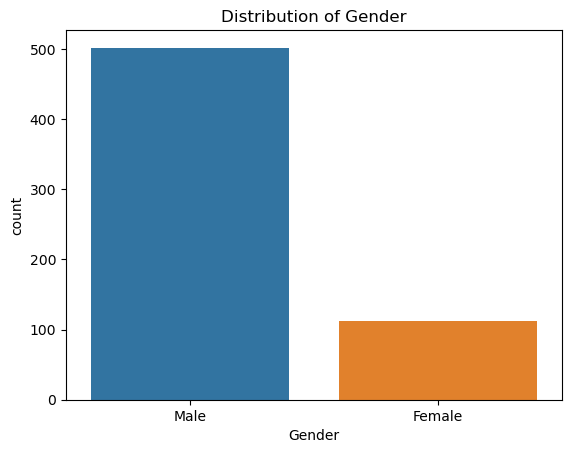

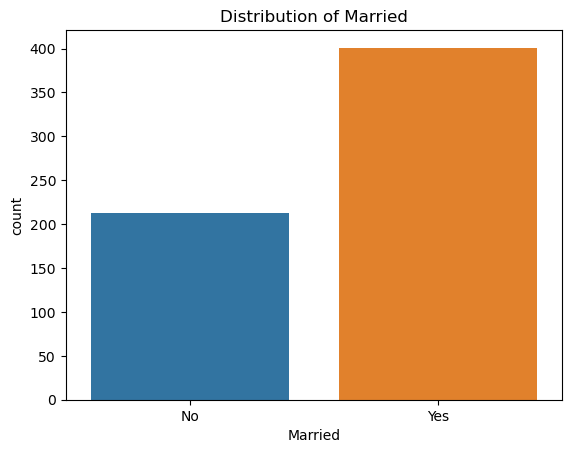

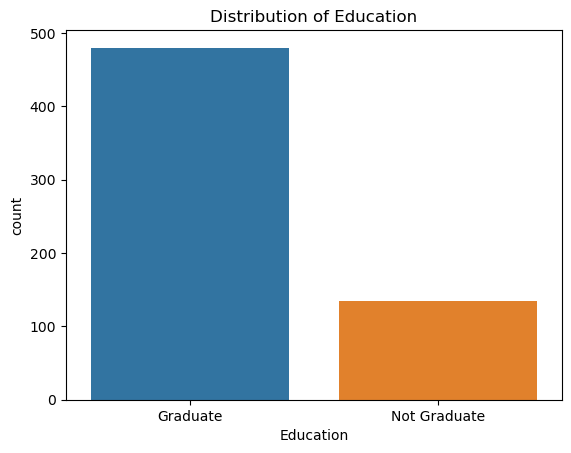

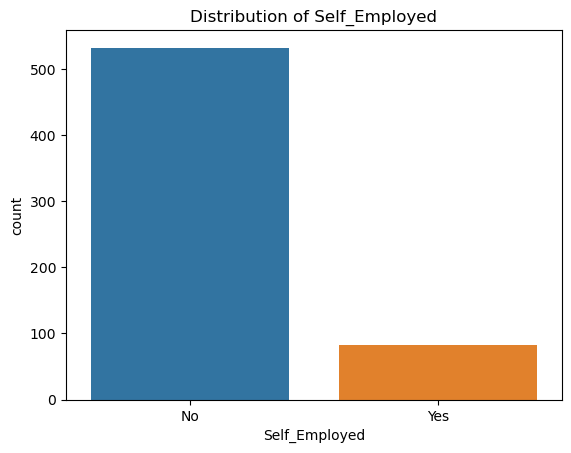

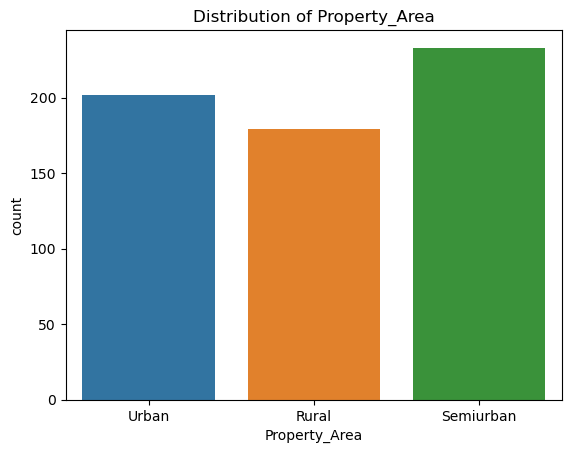

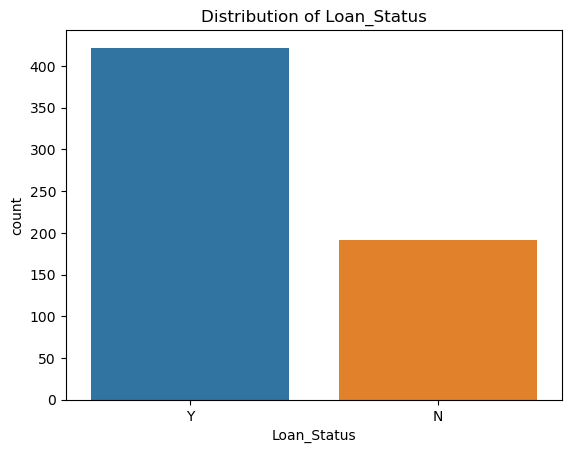

In [23]:
# univarite analysis of categorical column
cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area','Loan_Status']

for col in cols:
    
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()


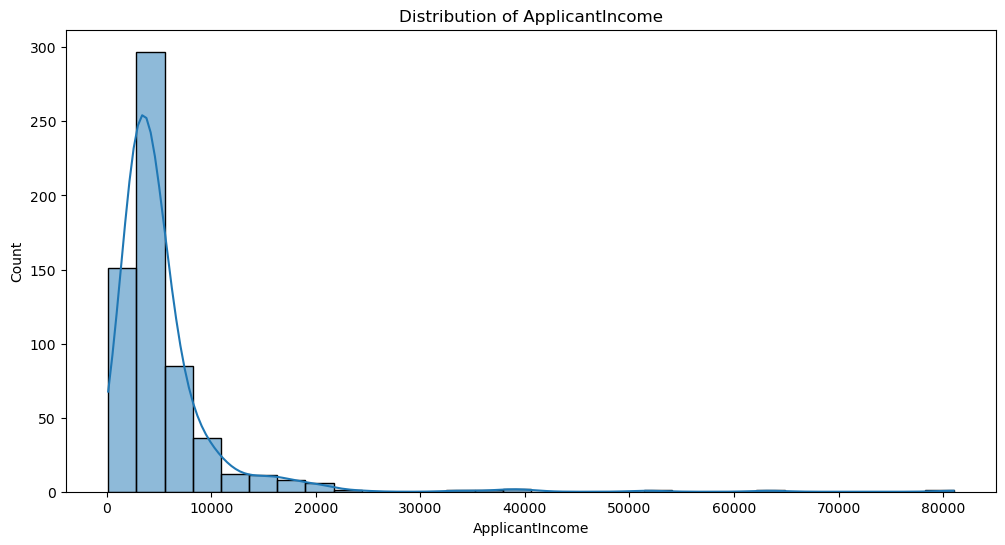

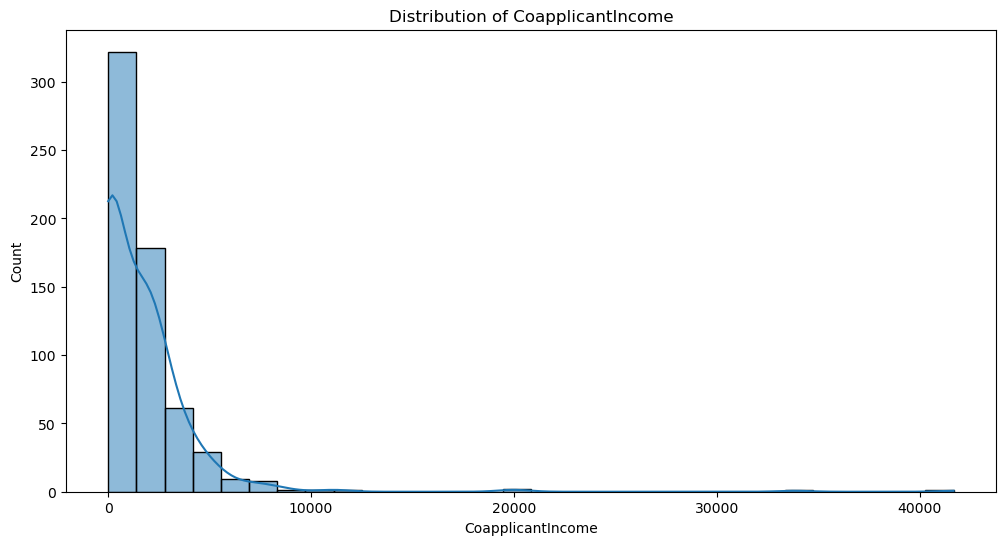

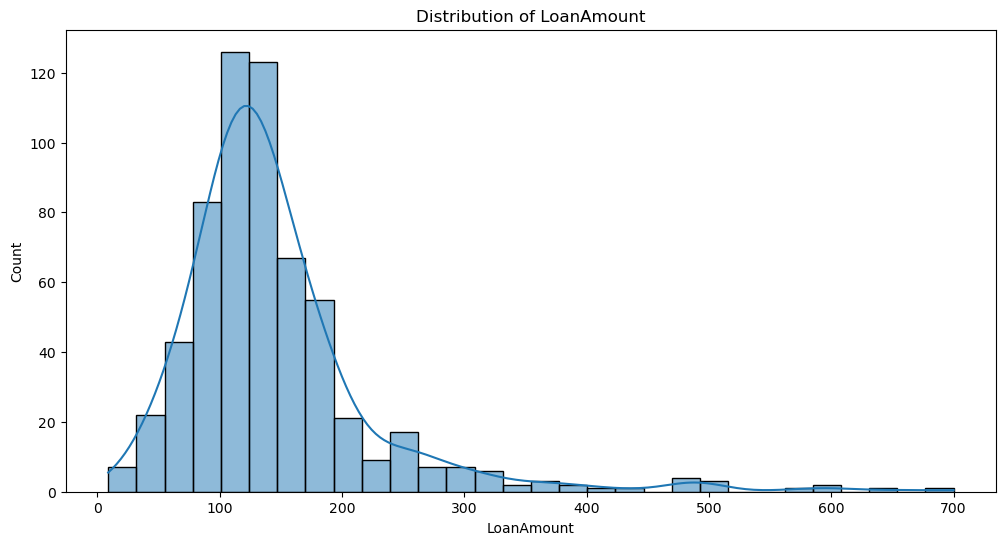

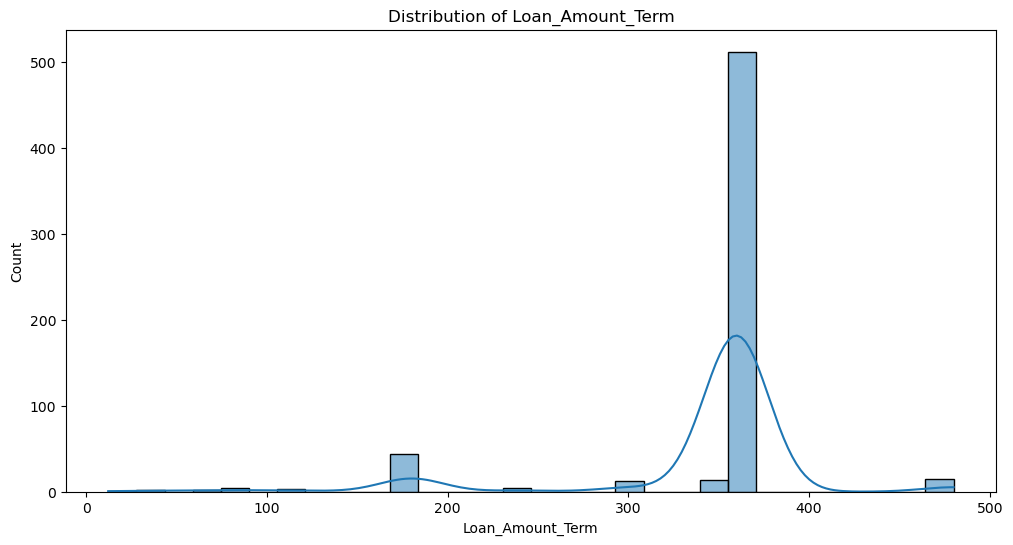

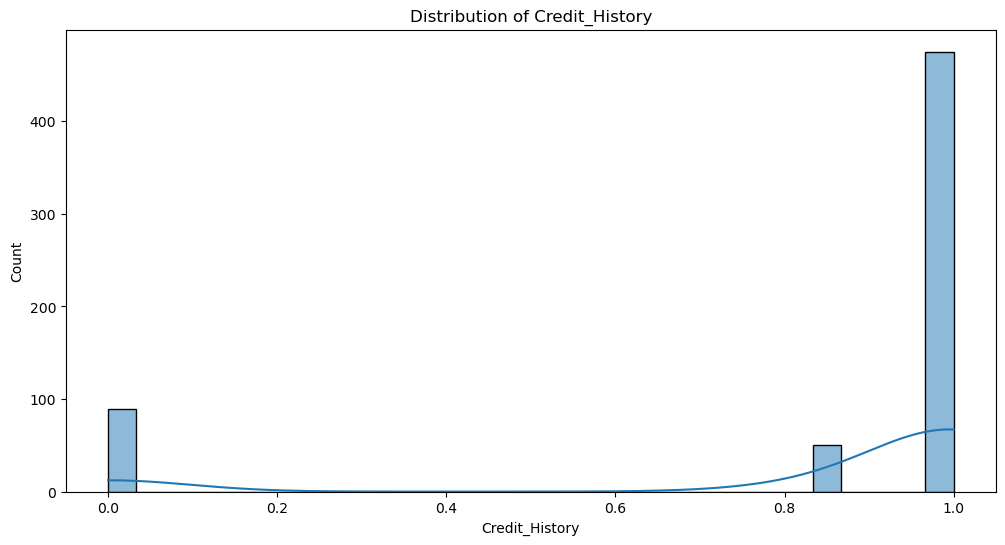

In [25]:
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

for i in cols:
    plt.figure(figsize=(12, 6))
    sns.histplot(df[i], bins=30, kde=True)
    plt.title(f'Distribution of {i}')
    plt.show()
    

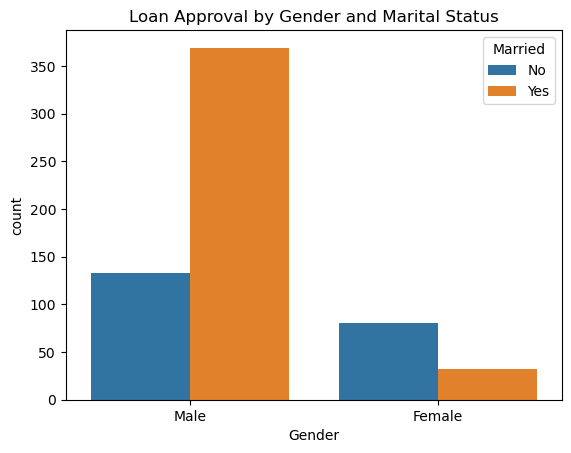

In [26]:
# Bivariate analysis
sns.countplot(x='Gender', hue='Married', data=df)
plt.title('Loan Approval by Gender and Marital Status')
plt.show()


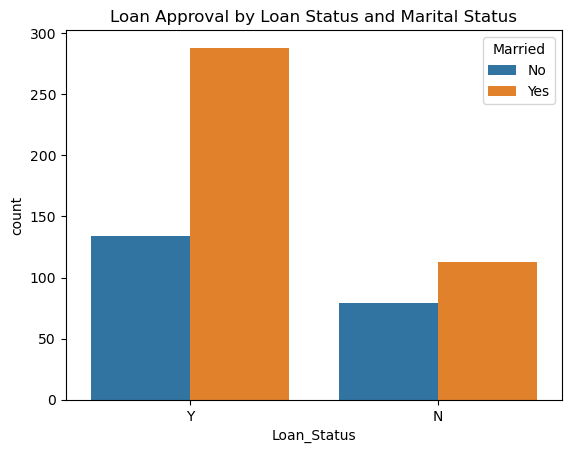

In [27]:
sns.countplot(x='Loan_Status', hue='Married', data=df)
plt.title('Loan Approval by Loan Status and Marital Status')
plt.show()


Married men are more likely to get loan.

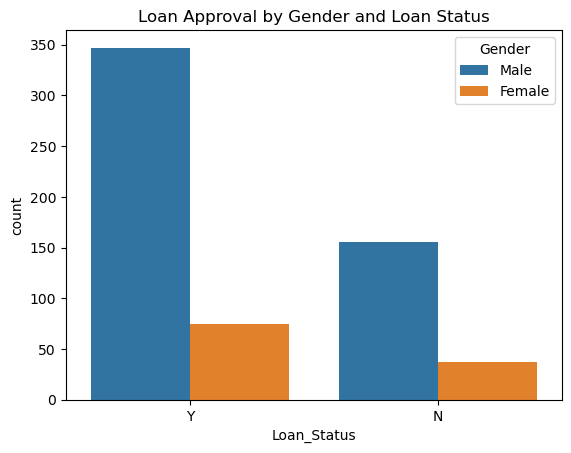

In [28]:
sns.countplot(x='Loan_Status', hue='Gender', data=df)
plt.title('Loan Approval by Gender and Loan Status')
plt.show()


Male customers are more likely to get loan approved as compared to female customers.

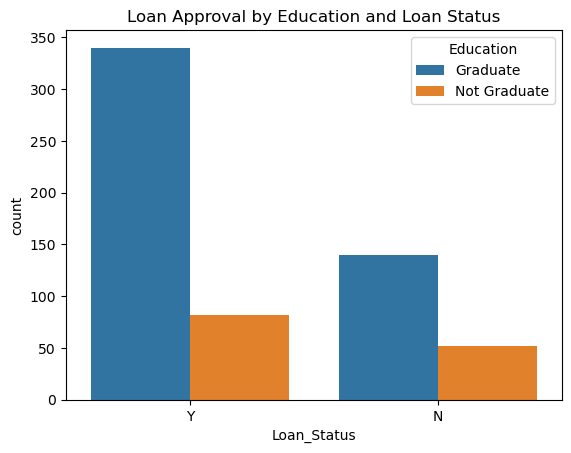

In [29]:
sns.countplot(x='Loan_Status', hue='Education', data=df)
plt.title('Loan Approval by Education and Loan Status')
plt.show()


Graduate customers have higher chance to getting approval for loan as compared to Not Graduate.

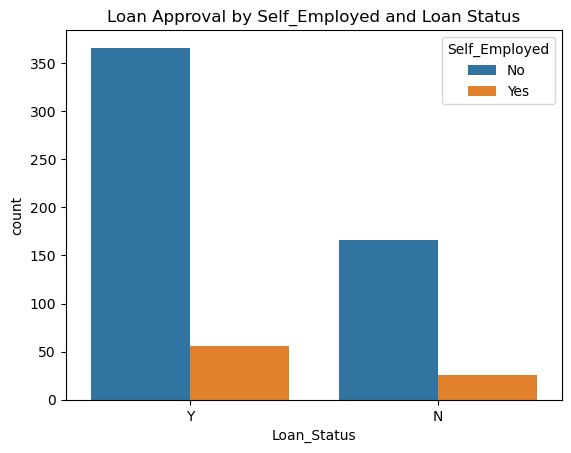

In [30]:
sns.countplot(x='Loan_Status', hue='Self_Employed', data=df)
plt.title('Loan Approval by Self_Employed and Loan Status')
plt.show()


Self employed people are getting more loan approved as compared to people who are not self employed.

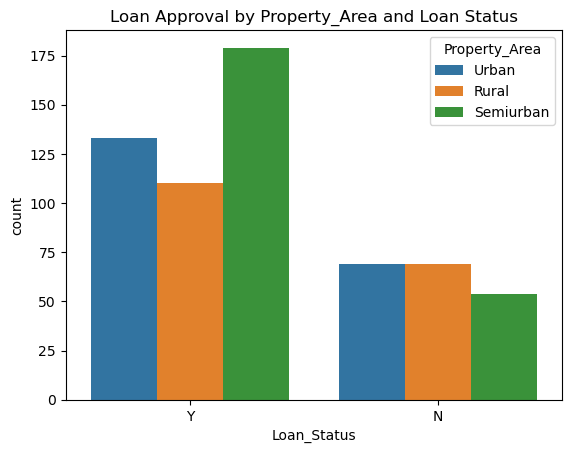

In [31]:
sns.countplot(x='Loan_Status', hue='Property_Area', data=df)
plt.title('Loan Approval by Property_Area and Loan Status')
plt.show()


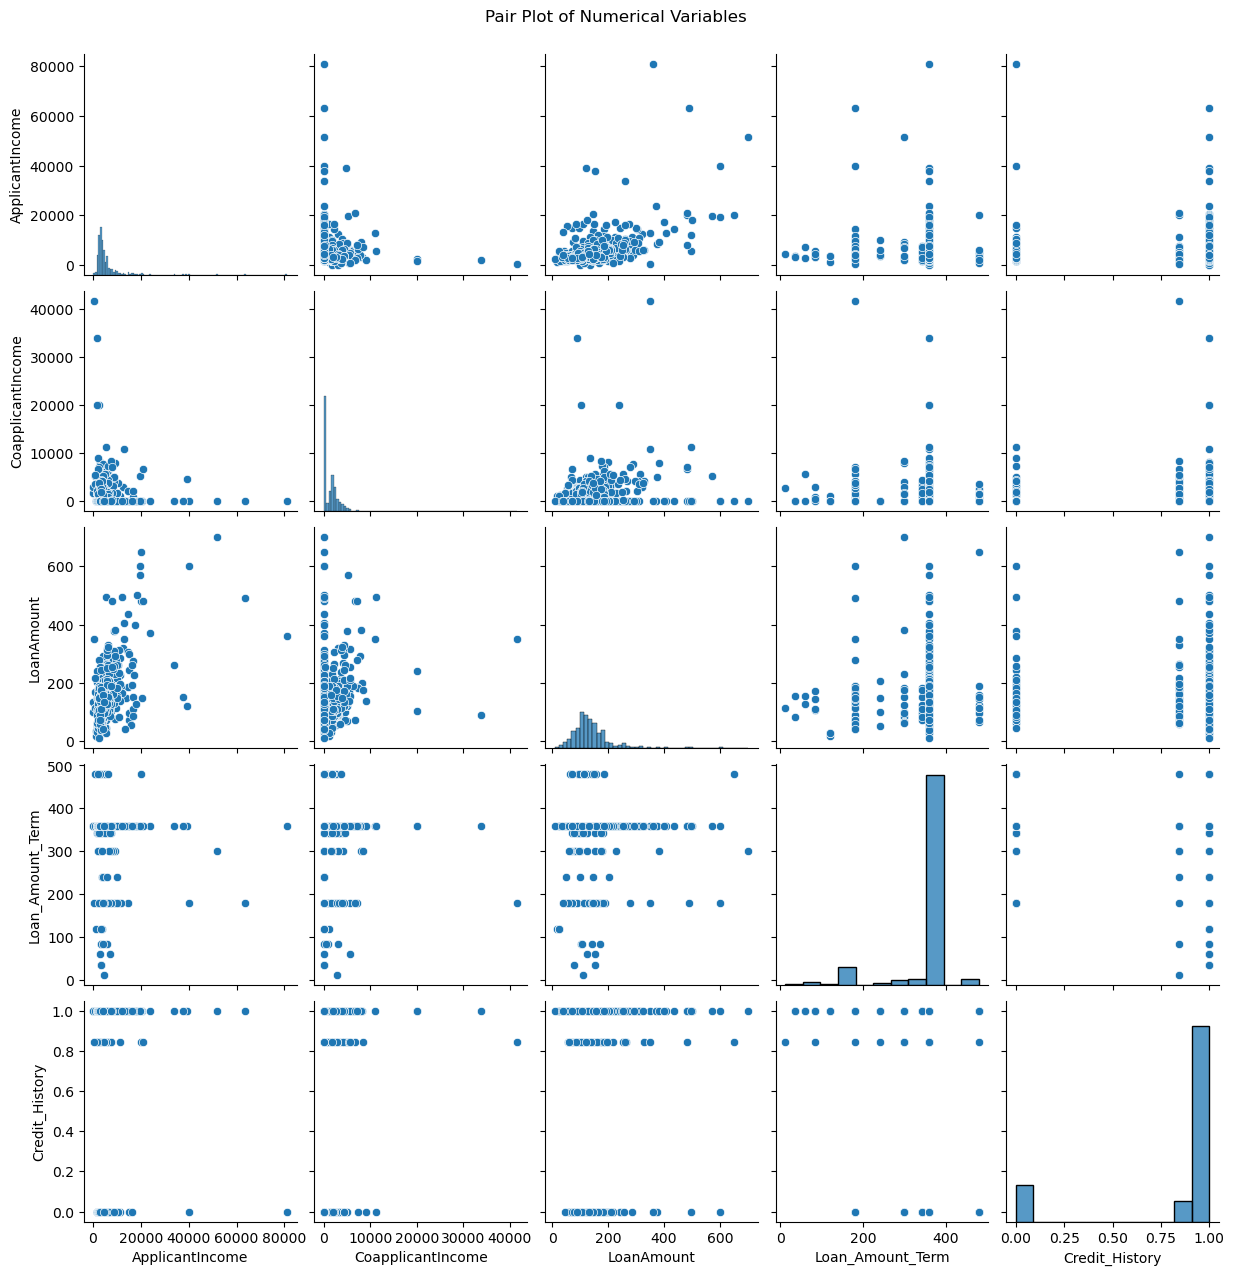

In [32]:
sns.pairplot(df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

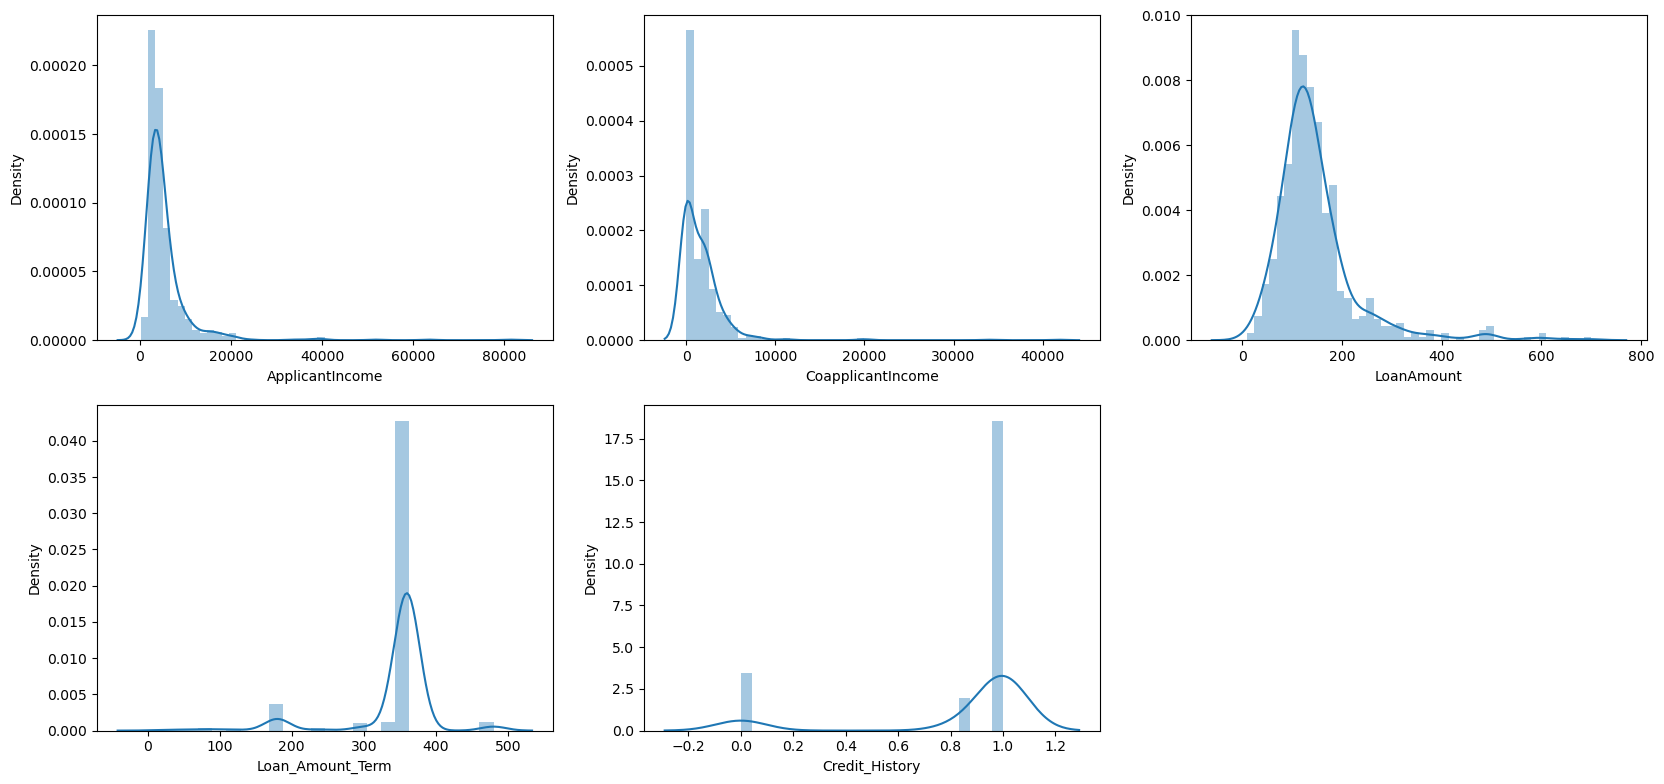

In [36]:
# checking how data is distributed for every column 
num_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(20,60),facecolor='white')

plotnumber=1
for i in num_cols:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[i])
    plt.xlabel(i)
    plotnumber+=1
plt.show()

In [37]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


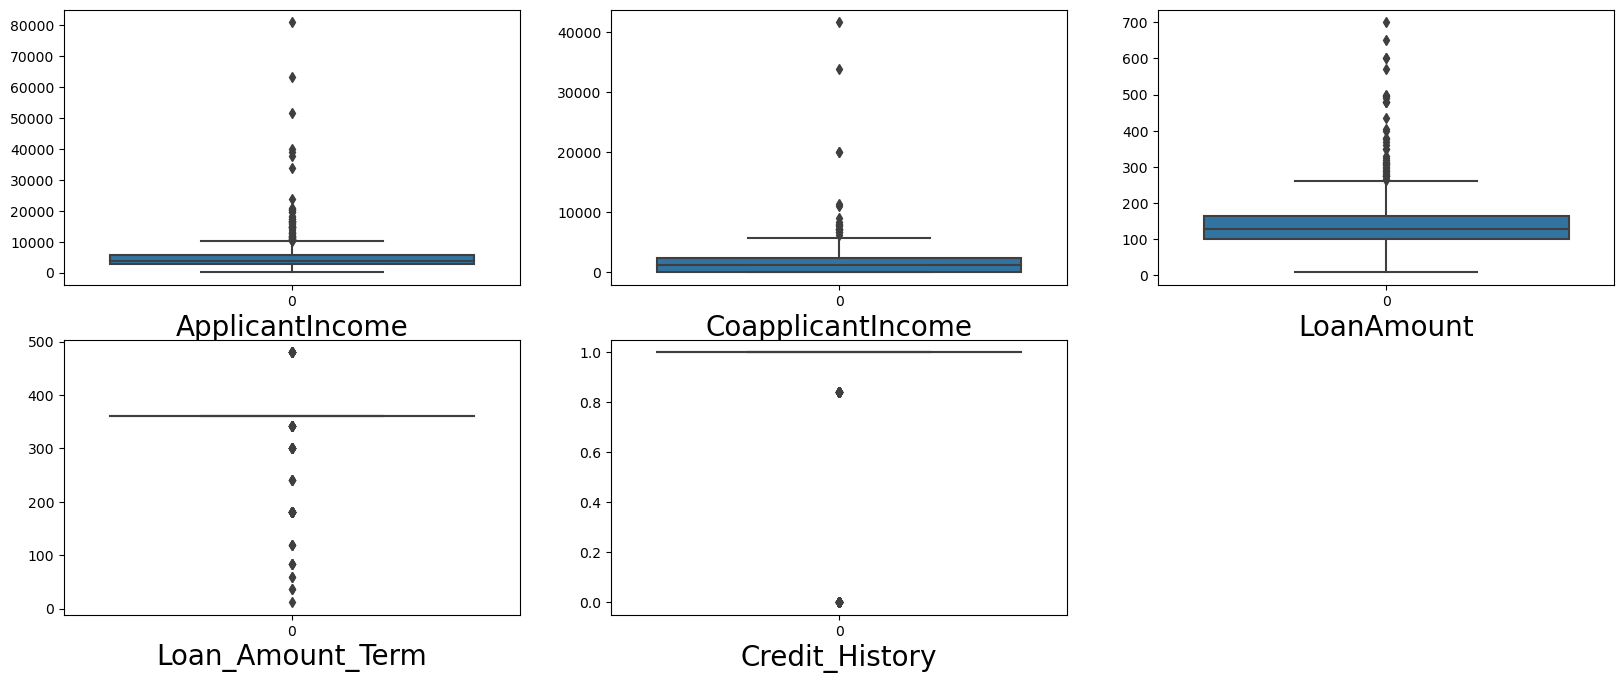

In [38]:
# Visualizing the outliers using boxplot
plt.figure(figsize=(20,25))
graph = 1

for column in num_cols:
    if graph<=16: 
        plt.subplot (6,3,graph) 
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column, fontsize=20)
    
    graph+=1
plt.show()

We need not remove them as they are practically possible scenarios. WE'll check for skewnss now.

In [39]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

There are skewness in every column so we will try to remove that.

In [40]:
skewed_columns = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']

for column in skewed_columns:
    df[column] = np.cbrt(df[column])

In [41]:
df.skew()

ApplicantIncome      2.083638
CoapplicantIncome    0.196726
LoanAmount           0.832841
Loan_Amount_Term    -3.573315
Credit_History      -2.014285
dtype: float64

In [42]:
skewed_columns = ['ApplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']

for column in skewed_columns:
    df[column] = np.sqrt(df[column])

In [43]:
df.skew()

ApplicantIncome      1.292001
CoapplicantIncome    0.196726
LoanAmount           0.328378
Loan_Amount_Term    -4.112403
Credit_History      -2.019970
dtype: float64

In [44]:
skewed_columns = ['ApplicantIncome','Loan_Amount_Term','Credit_History']

for column in skewed_columns:
    df[column] = np.exp(df[column])

In [45]:
df.skew()

ApplicantIncome      6.687170
CoapplicantIncome    0.196726
LoanAmount           0.328378
Loan_Amount_Term    -3.065565
Credit_History      -2.017136
dtype: float64

In [48]:
skewed_columns = ['ApplicantIncome','Loan_Amount_Term','Credit_History']

for column in skewed_columns:
    df[column] = np.log1p(df[column])

In [49]:
df.skew()

ApplicantIncome      0.652273
CoapplicantIncome    0.196726
LoanAmount           0.328378
Loan_Amount_Term    -4.600679
Credit_History      -2.020912
dtype: float64

In [50]:
skewed_columns = ['ApplicantIncome','Loan_Amount_Term','Credit_History']

df[column] = df[column] ** 2

In [51]:
df.skew()

ApplicantIncome      0.652273
CoapplicantIncome    0.196726
LoanAmount           0.328378
Loan_Amount_Term    -4.600679
Credit_History      -2.017855
dtype: float64

In [52]:
from scipy.stats import yeojohnson

skewed_columns = ['ApplicantIncome','Loan_Amount_Term','Credit_History']

for column in skewed_columns:
    df[column], _ = yeojohnson(df[column] + 1)


In [53]:
df.skew()

ApplicantIncome     -0.088974
CoapplicantIncome    0.196726
LoanAmount           0.328378
Loan_Amount_Term     0.393389
Credit_History      -1.916464
dtype: float64

In [54]:
from scipy.stats import boxcox

df['Credit_History'], _ = boxcox(df['Credit_History'] + 1)

In [55]:
df.skew()

ApplicantIncome     -0.088974
CoapplicantIncome    0.196726
LoanAmount           0.328378
Loan_Amount_Term     0.393389
Credit_History      -1.916464
dtype: float64

We have removed skewness from all columns except Credit_History,As we have applied many transformation methods to it and skewness is still present there so we will keep it as it is and move ahead.

In [56]:
cor = df.corr()
cor

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.355029,0.494555,-0.052935,0.020679
CoapplicantIncome,-0.355029,1.000000,0.169040,-0.014007,-0.006071
LoanAmount,0.494555,0.169040,1.000000,0.055205,-0.023199
Loan_Amount_Term,-0.052935,-0.014007,0.055205,1.000000,-0.005066
Credit_History,0.020679,-0.006071,-0.023199,-0.005066,1.000000


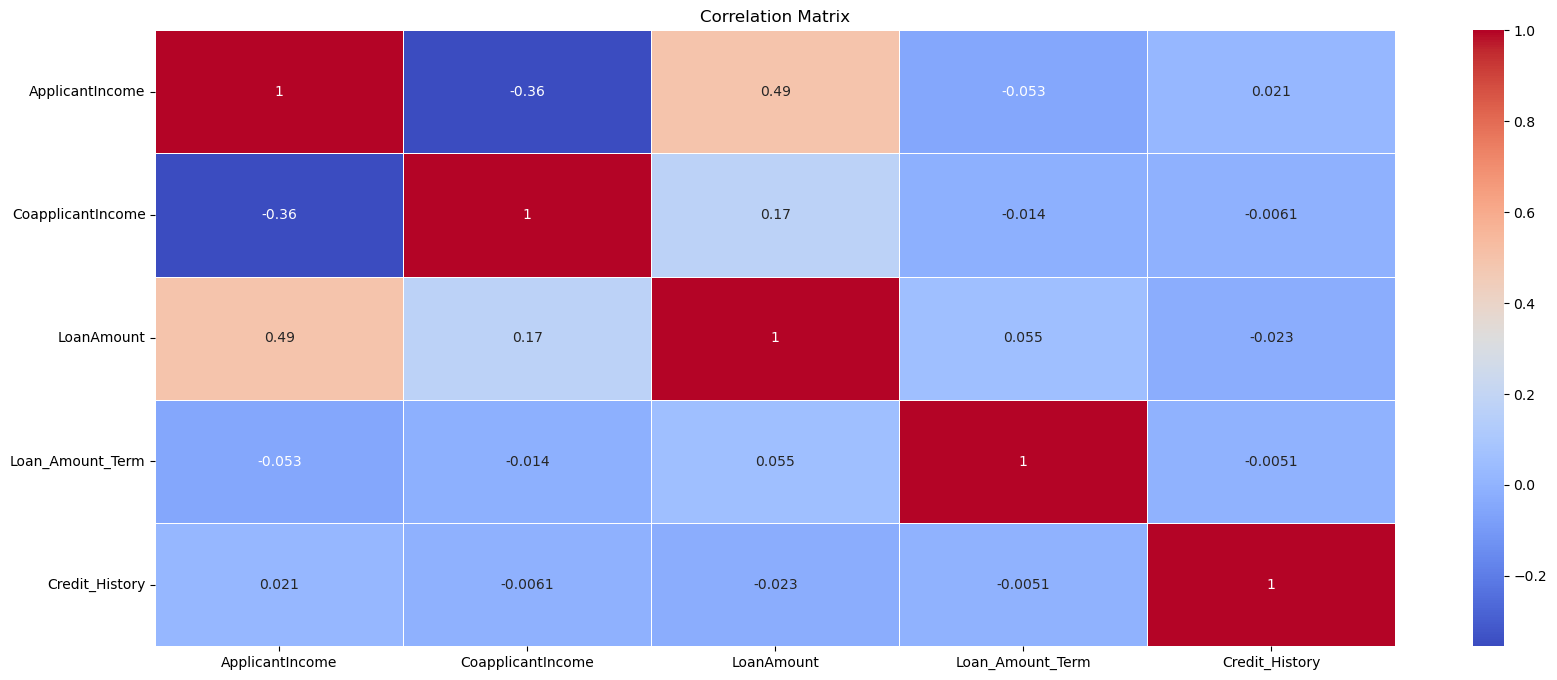

In [57]:
# visualizing the correlation matrix using a heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(cor, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [58]:
# Encoding categorical columns using OrdinalEncoder 
from sklearn.preprocessing import OrdinalEncoder 
df1 = df.copy()

OE = OrdinalEncoder()

for i in df1.columns:
    if df1[i].dtypes == 'object':
        df1[i] = OE.fit_transform(df1[i].values.reshape(-1, 1))

df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,0.363077,0.000000,2.295776,2.522792e+40,5.084867e+10,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,0.362790,11.467457,2.244924,2.522792e+40,5.084867e+10,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,0.362275,0.000000,2.010284,2.522792e+40,5.084867e+10,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,0.362088,13.310098,2.220906,2.522792e+40,5.084867e+10,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.363106,0.000000,2.281409,2.522792e+40,5.084867e+10,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,0.362233,0.000000,2.034900,2.522792e+40,5.084867e+10,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,0.362659,0.000000,1.849311,3.179557e+39,5.084867e+10,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,0.363444,6.214465,2.514896,2.522792e+40,5.084867e+10,2.0,1.0
612,1.0,1.0,2.0,0.0,0.0,0.363374,0.000000,2.391334,2.522792e+40,5.084867e+10,2.0,1.0


In [59]:
#splitting the data
x = df1.drop('Loan_Status',axis=1)
y = df1['Loan_Status']

In [60]:
#Feature Scaling using Standard Scalarization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x= pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.545516,-1.053225,0.211813,0.185745,0.464884,1.223298
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.171602,0.561256,-0.061373,0.185745,0.464884,-1.318513
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.500585,-1.053225,-1.321903,0.185745,0.464884,1.223298
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.744969,0.820678,-0.190402,0.185745,0.464884,1.223298
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.584048,-1.053225,0.134631,0.185745,0.464884,1.223298
...,...,...,...,...,...,...,...,...,...,...,...
609,-2.117107,-1.372089,-0.737806,-0.528362,-0.392601,-0.555621,-1.053225,-1.189660,0.185745,0.464884,-1.318513
610,0.472343,0.728816,2.236021,-0.528362,-0.392601,0.000037,-1.053225,-2.186675,-2.307511,0.464884,-1.318513
611,0.472343,0.728816,0.253470,-0.528362,-0.392601,1.025070,-0.178302,1.388965,0.185745,0.464884,1.223298
612,0.472343,0.728816,1.244745,-0.528362,-0.392601,0.933292,-1.053225,0.725167,0.185745,0.464884,1.223298


In [61]:
# Checking variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

print(vif_data)

             Variable       VIF
0              Gender  1.206736
1             Married  1.364624
2          Dependents  1.175665
3           Education  1.070139
4       Self_Employed  1.040708
5     ApplicantIncome  1.914849
6   CoapplicantIncome  1.558079
7          LoanAmount  1.687378
8    Loan_Amount_Term  1.048267
9      Credit_History  1.010342
10      Property_Area  1.019615


Clearly there is no multicollinerity exits. we will move ahead and check for best random state and accuracy.

In [62]:
# Checking for best random state and accuracy
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

best_RS = None
best_accuracy = 0.0

for i in range(1, 101):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    model = DecisionTreeClassifier()

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_RS = i

print(f'Best Random State: {best_RS}')
print(f'Best Accuracy: {best_accuracy:.2f}')


Best Random State: 81
Best Accuracy: 0.78


In [63]:
#splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = best_RS)

In [64]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier 
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score 
from sklearn.model_selection import cross_val_score

In [65]:
models = [
    LogisticRegression(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    SVC(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    ExtraTreesClassifier()
]

for model in models:
    model_name = model.__class__.__name__
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    # Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Cross-validation
    score = cross_val_score(model, x, y, cv=5, scoring="accuracy")
    
    # Printing results
    print(f"Results for {model_name}:")
    print('Accuracy: ', accuracy)
    print('Classification Report:\n', classification_rep)
    print('Confusion Matrix:\n', conf_matrix)
    
    # Cross-validating scores
    print("Cross-validation scores:", score)
    print("Mean Cross-validation score:", score.mean())
    print("Difference between Accuracy and cross-validation score is", (accuracy - score.mean()) * 100)
    
    print("\n" + "="*40 + "\n")


Results for LogisticRegression:
Accuracy:  0.7783783783783784
Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.42      0.55        59
         1.0       0.78      0.94      0.85       126

    accuracy                           0.78       185
   macro avg       0.78      0.68      0.70       185
weighted avg       0.78      0.78      0.76       185

Confusion Matrix:
 [[ 25  34]
 [  7 119]]
Cross-validation scores: [0.81300813 0.77235772 0.7804878  0.86178862 0.81967213]
Mean Cross-validation score: 0.8094628815140611
Difference between Accuracy and cross-validation score is -3.1084503135682673


Results for RandomForestClassifier:
Accuracy:  0.7891891891891892
Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.46      0.58        59
         1.0       0.79      0.94      0.86       126

    accuracy                           0.79       185
   macro avg       0.79    

The RandomForestClassifier has the highest accuracy and had the small difference between accuracy and cross-validation score. Therefore, the RandomForestClassifier is the best model.

#### Hyper parameter tunning

In [66]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initializing GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), params, cv=5, scoring='accuracy')


In [68]:
# Fittng the model
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [69]:
# Getting the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [71]:
best_model = grid_search.best_estimator_

# Making predictions on the test set using the best model
pred = best_model.predict(X_test)

# Evaluating the best model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.74
Classification Report:
               precision    recall  f1-score   support

         0.0       0.62      0.44      0.51        59
         1.0       0.77      0.87      0.82       126

    accuracy                           0.74       185
   macro avg       0.69      0.66      0.67       185
weighted avg       0.72      0.74      0.72       185

Confusion Matrix:
 [[ 26  33]
 [ 16 110]]


In [72]:
#Saving the model using .pkl
import joblib
joblib.dump(best_model, "Loan_Application.pkl")

['Loan_Application.pkl']

In [73]:
# loading the saved model and get the predictions
model=joblib.load("Loan_Application.pkl")

# Prediction
prediction = model.predict(X_test)
a = np.array(y_test)
df2 = pd.DataFrame()
df2["Predicted"] = prediction
df2["Original"] = a
df2

,Predicted,Original
0,1.0,0.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
180,1.0,1.0
181,1.0,0.0
182,1.0,0.0
183,1.0,1.0
